# Functions

In [7]:
def displayData(imagenes):
    fig = plt.figure(figsize=(8, 8), constrained_layout=False)
    outer_grid = fig.add_gridspec(10, 10, wspace=0.0, hspace=0.0)
    
    
    for x in range(100):
        ax = fig.add_subplot(outer_grid[x])
        ax.imshow(imagenes[x,:,:])
        
    all_axes = fig.get_axes()

    for ax in all_axes:
        ax.set_xticks([])
        ax.set_yticks([])
        for sp in ax.spines.values():
            sp.set_visible(True)

    plt.show()

In [62]:
#Particular
def nnCostFunction(weights, 
                   input_layer_size, 
                   hidden_layer_size, 
                   num_labels, 
                   X, y, lambdas):
    
    #X = X.reshape(10000,784)
    m = X.shape[0]
    J = 0
    
    Theta1 = weights[0]
    Theta2 = weights[1]
    
    Theta1_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)
    
    I = np.eye(num_labels) #Identity
    y_new = I[y,:].T # This transforms values from 0-10 to vector
    
    
    #Forward Propagation
    a1 = np.insert(X, 0, 1, axis=1) #Insert ones in 0 position in columns
    z2 = np.dot(Theta1, a1.T)
    a2 = sigmoid(z2)
    z3 = np.dot(Theta2, np.insert(a2,0,1,axis=0))
    a3 = sigmoid(z3)
    h = a3
    
    #Backpropagation
    d3 = a3-y_new
    d2 = np.dot(Theta2.T,d3)*sigmoidGradient(np.insert(z2,0,1,axis=0))
    
    delta2 = np.dot(d3, np.insert(a2,0,1,axis=0).T)
    delta1 = np.dot(d2[1:,:], a1)
    
    
     
    
    #Cost Function
    termino1 = -y_new*np.log(h)
    termino2 = -(1-y_new)*np.log(1-h)
    regularizationterm = (np.sum(Theta1**2)+np.sum(Theta2**2))
    J = (1/m)*np.sum(termino1+termino2)+(lambdas/(2*m))*regularizationterm
    
    #Gradients
    Theta1_grad = delta1
    Theta2_grad = delta2
    gradients_params = {'Gradient1':Theta1_grad, 'Gradient2':Theta2_grad}#Creation of a dictionary for weights
    gradients = list(gradients_params.values())
    
    return J, gradients
    

In [188]:
#General
def nnCostFunctionAuto(weights, #It is a list of all weights
                   unit_layers, #It is a list containing the size of each layer
                   X, y, lambdas): 
    
    #num_labels = unit_layers.index(unit_layers[-1])+1
    num_labels = len(unit_layers)
    
    I = np.eye(unit_layers[-1]) #Identity
    y_new = I[y,:].T # This transforms values from 0-10 to vector
    
    m = X.shape[0]
    X = X.T
    A = []
    Z = []
    gradients = []
    
    #Forward
    for i in range(num_labels):#We go layer to layer
        if i == 0:#input layer
            a = X
            A.append(a)
        else:#hidden layer and final layer
            z = np.dot(weights[i-1], np.insert(a, 0, 1, axis=0))
            Z.append(z)
            a = sigmoid(z)
            A.append(a)
        
    h = A[-1]#Final layer

    regularizationterm = 0

    #Backpropagation
    for i in range(num_labels-1):
        j = (num_labels-2)-i
        if i == 0:#Final layer
            d = A[j+1]-y
            a = A[j]
            G = np.dot(d, np.insert(a,0,1,axis=0).T)
            gradients.insert(0, G)
        else:#hidden layers
            theta = weights[j+1]
            z = Z[j]
            d = np.dot(theta.T, d)*sigmoidGradient(np.insert(z,0,1,axis=0))
            a = A[j]
            G = np.dot(d, np.insert(a,0,1,axis=0).T)
            gradients.insert(0, G[1:,:])
        regularizationterm = regularizationterm + np.sum(weights[j]**2)

    #Cost Function
    termino1 = -y_new*np.log(h)
    termino2 = -(1-y_new)*np.log(1-h)
    J = (1/m)*np.sum(termino1+termino2)+(lambdas/(2*m))*regularizationterm
    
    
    return J, gradients

In [149]:
J, G = nnCostFunctionAuto(weights, unit_layers, x, y, lambdas)
print(J)
print(G[0].shape)
print(G[1].shape)

0.0010442728508965422
(2, 4)
(3, 3)


In [8]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [53]:
def sigmoidGradient(z):
    gz = sigmoid(z)
    g = gz*(1-gz)
    return g

In [4]:
def randInitializeWeights(L_in, L_out):
    epsilon_init = 0.12
    W = np.random.rand(L_out, L_in+1)*(2*epsilon_init)-epsilon_init
    return W

# Import libraries

In [1]:
from scipy.io import loadmat
import numpy as np
import random
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import transforms
from tqdm import tqdm
import math

# Data Importation

In [120]:
# Import pytorch data
transform = transforms.Compose([
                                transforms.ToTensor()])
mnist_data_test = torchvision.datasets.MNIST(root = '.', train=False, download=True,
                                            transform=transform)
#vars(mnist_data_test)
#dir(mnist_data_test)
X = mnist_data_test.data.numpy()
X_dimensions = X.shape
x = X.reshape(X_dimensions[0], X_dimensions[1]*X_dimensions[2])
y = mnist_data_test.targets.numpy()
print(X.shape)
print(y.shape)

(10000, 28, 28)
(10000,)


In [ ]:
# Import matlab dat
X = loadmat('ex4data1.mat')['X'] # each row contain the vector pixel of each image
y = loadmat('ex4data1.mat')['y'] # each row contain the number
print(X.shape)
print(y.shape)

In [190]:
# Import matlab dat new
x = loadmat('ex4data1.mat')['X'] # each row contain the vector pixel of each image
y = loadmat('ex4data1.mat')['y'] # each row contain the number
X = x.reshape(x.shape[0], int(math.sqrt(x.shape[1])), int(math.sqrt(x.shape[1])))
X_dimensions = X.shape
y = np.where(y == 10, 0, y)
y = y.reshape(-1)
print(X.shape)
print(y.shape)

(5000, 20, 20)
(5000,)


In [197]:
w1 = loadmat('ex4weights.mat')['Theta1']
w2 = loadmat('ex4weights.mat')['Theta2']
weights = [w1, w2]
print(w1.shape)
print(w2.shape)

(25, 401)
(10, 26)


In [198]:
w1

array([[-2.25623899e-02, -1.05624163e-08,  2.19414684e-09, ...,
        -1.30529929e-05, -5.04175101e-06,  2.80464449e-09],
       [-9.83811294e-02,  7.66168682e-09, -9.75873689e-09, ...,
        -5.60134007e-05,  2.00940969e-07,  3.54422854e-09],
       [ 1.16156052e-01, -8.77654466e-09,  8.16037764e-09, ...,
        -1.20951657e-04, -2.33669661e-06, -7.50668099e-09],
       ...,
       [-1.83220638e-01, -8.89272060e-09, -9.81968100e-09, ...,
         2.35311186e-05, -3.25484493e-06,  9.02499060e-09],
       [-7.02096331e-01,  3.05178374e-10,  2.56061008e-09, ...,
        -8.61759744e-04,  9.43449909e-05,  3.83761998e-09],
       [-3.50933229e-01,  8.85876862e-09, -6.57515140e-10, ...,
        -1.80365926e-06, -8.14464807e-06,  8.79454531e-09]])

# Initialization

In [ ]:
#For Matlab
input_layer_size = 400 # Input units
hidden_layer_size = 25 # Hidden units
num_labels = 10 # Classes
theta1 = loadmat('ex4weights.mat')['Theta1']
theta2 = loadmat('ex4weights.mat')['Theta2']
print(theta1.shape)
print(theta2.shape)

In [ ]:
#For Pytorch
input_layer_size = 784 # Input units
hidden_layer_size = 25 # Hidden units
num_labels = 10 # Classes
theta1 = np.random.rand(25,785)
theta2 = np.random.rand(10,26)
nn_params = {'theta1':theta1, 'theta2':theta2}#Creation of a dictionary for weights
weights = list(nn_params.values()) #This is a list
lambdas = 0
#lambdas = 1

In [196]:
#For Pytorch with automatization
lambdas = 0
layers = 3 # number of layers
unit_layers = [X_dimensions[1]*X_dimensions[2], 25, 10]
weights = []
#Creating thetas: Random Initialize
for i in range(layers-1):
    theta = randInitializeWeights(unit_layers[i], unit_layers[i+1])
    weights.append(theta)
    print(theta.shape)
print(unit_layers)

(25, 401)
(10, 26)
[400, 25, 10]


# Visualizing Data

In [ ]:
# For Matlab
# Parameters
X_dimensions = X.shape
m = X_dimensions[0] # No. of training examples
n = X_dimensions[1] # No. of features

# Randomly select 100 data points to display
sel = np.random.randint(m, size=100)
images = X[sel,:].reshape((100,20,20)) #Make a reshape to convert to 20x20 pixels
displayData(images)

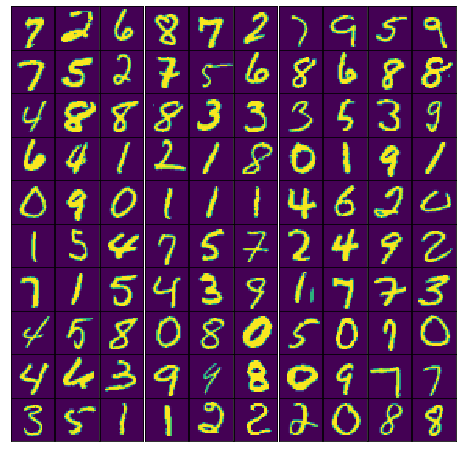

In [10]:
# Pytorch data
# Parameters
#new_x = X.reshape(10000, 784)
x_dimensions = x.shape
m = x_dimensions[0] # No. of training examples
n = x_dimensions[1] # No. of features

# Randomly select 100 data points to display
sel = np.random.randint(m, size=100)
images = x[sel,:].reshape((100,int(math.sqrt(x_dimensions[1])),int(math.sqrt(x_dimensions[1])))) #Make a reshape to convert to 20x20 pixels
displayData(images)

# Compute Cost Function (FeedForward Propagation)

In [195]:
J,_ = nnCostFunctionAuto(weights, unit_layers, x, y, lambdas)
J

10.44145967277798

# Implementing regularization

In [82]:
lambdas = 1

In [84]:
J,_ = nnCostFunctionAuto(weights, unit_layers, x, y, lambdas)
J

7.095007255780424

# Implementing Backpropagation

In [87]:
lambdas = 0
J, gradients = nnCostFunctionAuto(weights, unit_layers, x, y, lambdas)
print(J)
print(gradients[0].shape)
print(gradients[1].shape)

7.090227482121722
(25, 785)
(10, 26)


# Gradient Checking

In [156]:
x = np.random.rand(5, 3)
y = np.array([1, 0, 2, 0, 1])
print(x.shape)
print(y.shape)

(5, 3)
(5,)


In [157]:
lambdas = 0
layers = 3 # number of layers
unit_layers = [x.shape[1], 2, 3]
weights = []
#Creating thetas: Random Initialize
for i in range(layers-1):
    theta = randInitializeWeights(unit_layers[i], unit_layers[i+1])
    weights.append(theta)
    print(theta.shape)
print(x.shape[1])

(2, 4)
(3, 3)
3


In [158]:
e = 0.0001

In [159]:
#For Theta1

grad1 = np.zeros(weights[0].shape)
for i in tqdm(range (weights[0].shape[0])):
    for j in tqdm(range (weights[0].shape[1])):
        temporal = np.zeros(weights[0].shape)
        temporal[i,j] = e
        weights_pos = [weights[0]+temporal, weights[1]]
        J_pos,_ = nnCostFunctionAuto(weights_pos, unit_layers, x, y, lambdas)
        temporal[i,j] = -e
        weights_neg = [weights[0]+temporal, weights[1]]
        J_neg,_ = nnCostFunctionAuto(weights_neg, unit_layers, x, y, lambdas)
        grad1[i,j] = (J_pos-J_neg)/(2*e)
        temporal[i,j] = 0
        
        
grad2 = np.zeros(weights[1].shape)
for i in tqdm(range (weights[1].shape[0])):
    for j in tqdm(range (weights[1].shape[1])):
        temporal = np.zeros(weights[1].shape)
        temporal[i,j] = e
        weights_pos = [weights[0], weights[1]+temporal]
        J_pos,_ = nnCostFunctionAuto(weights_pos, unit_layers, x, y, lambdas)
        temporal[i,j] = -e
        weights_neg = [weights[0], weights[1]+temporal]
        J_neg,_ = nnCostFunctionAuto(weights_neg, unit_layers, x, y, lambdas)
        grad2[i,j] = (J_pos-J_neg)/(2*e)
        temporal[i,j] = 0


100%|██████████| 4/4 [00:00<00:00, 1116.77it/s]

100%|██████████| 3/3 [00:00<00:00, 1462.96it/s]

100%|██████████| 3/3 [00:00<00:00, 1227.12it/s]

100%|██████████| 3/3 [00:00<00:00, 245.43it/s]


In [160]:
print(grad1.shape)
print(grad2.shape)

(2, 4)
(3, 3)


In [161]:
J, gradients = nnCostFunctionAuto(weights, unit_layers, x, y, lambdas)
print(gradients[0].shape)
print(gradients[1].shape)

(2, 4)
(3, 3)


In [162]:
error1 = np.linalg.norm(gradients[0]-grad1)
error2 = np.linalg.norm(gradients[1]-grad2)
print(error1)
print(error2)

0.045222767337482636
3.2946335151410047


In [ ]:
#Gradient Descent
initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)
for _ in range(100):
    nn_params = {'theta1':initial_Theta1, 'theta2':initial_Theta2}#Creation of a dictionary for weights
    weights = list(nn_params.values()) #This is a list
    J, gradients = nnCostFunction(weights, input_layer_size, hidden_layer_size, num_labels, X, y, lambdas)
    initial_Theta1-=0.0001*gradients[0]
    initial_Theta2-=0.0001*gradients[1]
    print(J)

In [167]:
A = np.random.rand(2,2)
A

array([[0.01109647, 0.24593227],
       [0.53376677, 0.52235938]])

In [168]:
L = np.array([2, 2, 2, 0, 2, 0, 2])
L = np.where(L == 0, 1, L)

In [170]:
print(L)

[2 2 2 1 2 1 2]


In [40]:
l = []

In [41]:
l.append(D)

In [43]:
l[0]

array([[1, 2, 3],
       [6, 5, 4],
       [8, 7, 9]])

In [142]:
lo = [1,2,3,4,5]

In [143]:
lo.index(lo[-1])

4

In [144]:
len(lo)

5

In [ ]:
A[0,0]= 2
A

In [ ]:
A[:, 1]

In [ ]:
A**2

In [ ]:
np.insert(A, 0, 1, axis=1)

In [ ]:
np.sum(A)

In [ ]:
np.sum(np.sum(A,axis=1), axis=0)

In [9]:
D = np.array([[1,2,3],[6,5,4],[8,7,9]])
D

array([[1, 2, 3],
       [6, 5, 4],
       [8, 7, 9]])

In [ ]:
E = np.array([A, D])
E

In [ ]:
E.reshape(6,3)

In [ ]:
B = np.array([[1,2,3,8,9,5,6,7,5,3], [3,4,5,2,1,7,5,9,8,1]])
B

In [ ]:
B.shape

In [ ]:
R = np.reshape(B, (-1,5,4))
R

In [ ]:
C = np.array([[[1,2,3,8,9],[5,6,7,5,3]],[[3,4,5,2,1],[7,5,9,8,1]]])
C

In [ ]:
A = np.rand()